# Numpy

* Пакет для Python, реализующий многомерные массивы
* Массивы **статически типизированные**. Тип элементов определяется при создании массива.
* Массивы эффективно используют память.
* Методы линейной алгебры в numpy реализованы на C и Fortran, что обеспечивает хорошую производительность.
* Пакет numpy активно используется в научных проектах по всему миру.

In [ ]:
import numpy as np

## Создание массивов

Существует несколько способов создания новых numpy массивов:
* через списки и кортежи Python
* используя специальные функции numpy такие, как `arange`, `linspace`, и так далее.
* вычитывая данные из файлов

### 1D массивы

### Многомерные массивы

При попытке назначить значение другого типа будет выдана ошибка:

В numpy существует множество функций для генерации массивов:

### `arange`

Генерирует значения в интервале [start, stop) с шагом step. Аналог встроенной функции Python `range`. На уровне типов они, конечно, отличаются. `np.arange` возвращает обычный numpy-массив, в то время как `range` является lazy sequence/lazy iterable и стоит в общем ряду с `list` и `tuple`. Funny fact: `range` не является итератором -- он не "иссякает", для него нельзя вызвать `next()` и можно `len()`, но, в отличие от списка, он lazy

### `linspace` и `logspace`

`linspace` Генерирует равномерно распределенные числа, включая конечные точки.

`logspace` То же, но в логарифмической шкале.

### `zeros`, `ones`, `zeros_like` и `ones_like`

### Другие функции

### Упражнение 1
Построить диагональную матрицу, на диагонали которой расположены числа от 0 до 3.

### Упражнение 2

Создать матрицу размерности 3x3x3 со случайными значениями, имеющими равномерное распределение от 1 до 5.

## Внутреннее устройство numpy массивов

Рассмотрим представление данных в numpy массиве (иллюстрация взята из [C. Harris et al. (2020)](https://www.nature.com/articles/s41586-020-2649-2))

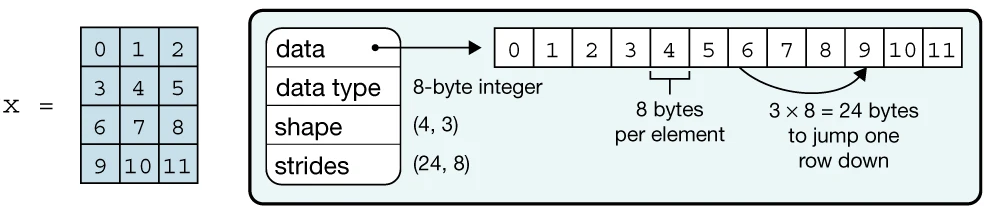

Какой бы shape ни имел массив, в памяти он хранится как обыкновенный линейный массив. В примере показан C-order хранения многомерного массива ("укладываем" массив по строкам $\Longrightarrow$ последний индекс является самым быстрым). Такие массивы называют C-contiguous. Альтернативой является Fortran-order,  где массив "укладывается" по столбцам $\Longrightarrow$ первый индекс является самым быстрым. Такие массивы называют Fortran-contiguous. Узнать, является ли массив C-contiguous или Fortran-contiguous, мы можем с помощью атрибута `flags`. В общем случае numpy используется C-order:

Как видно из иллюстрации выше, линейный массив (он же иногда называется буфером), в котором хранятся данные, хранится в атрибуте `data`. Более конкретно, в нем хранится указатель на первый элемент массива, поэтому работать с ним напрямую мы не можем:

### Strides

Другой атрибут, `strides`, задает шаги в байтах, необходимые для перехода к следующему элементу вдоль того или иного индекса. Например, для двумерного массива типа int16 с shape = (4, 3) и C-contiguous буфером мы получим stride = (3x2, 1x2)

В случае F-contiguous буфера мы получим stride = (1x2, 4x2):

### Копирование массивов в numpy

Как мы помним, в Python при присваивании не происходит копирование объектов. 

Глубокая копия создается в NumPy с помощью функции `copy`:

Numpy старается минимизировать количество копирований массивов, в результате чего многие операции, например slicing и в большинстве случаев reshape, возвращают view (представление) массива, а не его копию. Это становится возможным благодаря модификации shape, strides и указателя на первый элемент массива (то есть data). Помня об этом, всегда можно догадаться, произойдет копирование или будет использоваться view: всегда, когда можно построить массив из исходного путем модификации shape, stride и/или сдвига указателя в data, будет использоваться view. Рассмотрим несколько примеров

Воспользуемся slicing для взятия каждого второго столбца. Это эквивалентно удвоению stride по второму индексу. Следовательно, будет использоваться view без копирования массива

Проверить, является ли массив view, можно, обратившись к атрибуту `base`: он равен `None` для скопированных или вновь созданных массивов и равен исходному массиву для view

Аналогично можно убедиться, что slicing для взятие каждой второй строки, начиная со второй, так же даст view без какого-либо копирования. В данном случае происходит удвоение stride по первому индексу и сдвиг указателя вперед на один элемент

Из этих примеров становится ясно, что все операции slicing-а приводят к появлению view. Более сложная индексация, которую мы рассмотрим ниже, уже приведет к копированию

### Reshape

Метод `reshape` позволяет изменить shape массива на произвольный shape, дающий то же число элементов, что и оригинальный shape. Иными словами, если $\boldsymbol{s}^{(old)}$ обозначает оригинальный shape, а $\boldsymbol{s}^{(new)}$ - новый shape, то верным является следующее равенство: $\prod_{i=1}^{N_{old}} s_i^{(old)} = \prod_{i=1}^{N_{new}} s_i^{(new)}$.

Понять, каким будет конечный вид массива, легко. Достаточно представить, как текущий массив выглядит в линейной форме в соответствии с C-order или F-order в зависимости от аргумента `order`, передаваемого в `reshape` (по умолчанию используется C-order), и переписать его в многомерный вид в соответствии с новым shape, используя тот же order. Рассмотрим пример ниже

Линейная запись в C-order будет выглядеть как `[0, 1, ..., 10, 11]`, что соответствует `reshape(-1)`: 

Допустим теперь, что мы хотим получить shape = (2, 2, 3). В C-order самым быстрым индексом является последний, следовательно, фиксируя первые два индекса, мы должны получить подмассивы `a_1 = [0, 1, 2]`, `a_2 = [3, 4, 5]`, `a_3 = [6, 7, 8]` и `a_4 = [9, 10, 11]`. Их "схлопывание" дает снова линейный массив `[a_1, a_2, a_3, a_4]`. Снова используя C-order и фиксируя первый индекс, мы получаем два подмассива `[a_1, a_2]` и `[a_3, a_4]`. Следовательно, финальный массив будет иметь следующий вид:
```python
[
    [
        [0, 1, 2],
        [3, 4, 5],
    ],
    [
        [6, 7, 8],
        [9, 10, 11],
    ],
]
```

Аналогично мы можем получить reshape для F-order. Сначала мы выравниваем массив в соответствии с F-order, то есть `[0, 3, ..., 8, 11]`. Затем начинаем укладывать размерности в новом shape слева направо (от строк к столбцам).

Обратите внимание, что в этом случае линейный массив не имеет ни C-order, ни Fortran-order, в чем легко убедиться, обратившись к атрибуту `flags`:

Если `reshape` не может гарантировать константный stride, произойдет копирование вместо view. Например, такая ситуация возможна при выравнивании транспонированного массива:

Применение `reshape(-1)` к такому массиву приведет даст массив
```python
[0, 3, 6, 9, 1, 4, 7, 10, 2, 5, 8, 11]
```
что приводит к непостоянному stride:
```python
[3, 3, 3, -8, 3, 3, 3, -8, 3, 3, 3]
```
Следовательно, `b.reshape(-1)` приведет к копированию. Чтобы убедиться, что копирование произошло, воспользуемся атрибутом `base`. Обычно он равен `None` для скопированных и вновь созданных массивов и равен массиву-источнику при построении view.

Для `b.reshape(-1)` base будет равен скопированному транспонированному массиву (вероятно, копирование произошло внутри `reshape`):

## Слияние массивов

Функции `vstack`, `hstack` и `concatenate` позволяются составить общий массив из нескольких массивов:

### `concatenate`

Эта функция требует, чтобы все массивы имели одинаковое число размерностей:

Следовательно, мы вынуждены использовать `reshape`:

При этом все размерности, кроме только, по которой происходит конкатенация, должны совпадать:

### `hstack` и `vstack`

Синтаксический сахар для `concatenate`, чтобы не добавлять аргумент `axis`. Правило с размерностями при этом сохраняется

### `column_stack`

Синтаксический сахар для `concatenate`, позволяющий игнорировать правило с размерностями, когда мы просто хотим добавить столбец или составить матрицу из векторов-столбцов

## Индексация

Доступ к данным массива организуется с помощью индексов и оператора `[]`.

### Basic indexing

Для многомерных массивов индексами является кортеж целых чисел, то есть записи `m[1, 1]` и `m[(1, 1)]` эквивалентны

Можно использовать "`:`" для получения доступа к целой колонке или строке: 

Присваивание новых значений элементам массива:

### Slicing

NumPy поддерживает слайсинг, как и списки с кортежами в Python:

Все три параметра слайсинга являются опциональными: по умолчанию `start` равен **0**, `end` равен последнему элемену и `step` равен **1** в `a[start:stop:step]`:

Отрицательные индексы отсчитываются от конца массива:

Слайсы являются представлениями массива, а потому являются изменяемыми:

Слайсинг работает точно так же и для многомерных массивов:

### Advanced indexing

Если аргументом квадратных скобок является не-tuple последовательность целых чисел или булевых значений, а также любая последовательность последовательностей, то используется режим advanced indexing. Он позволяет выбирать произвольные элементы массивы. Обратите внимание, что advanced indexing всегда возвращает копию массива, а не view

Пример ниже возвращает два элемента матрицы: $m_{21}$ и $m_{22}$. В этом примере неявно использовался tuple, так что ниже приводят несколько эквивалентных примеров

### Упражнение 3
Создать нулевую матрицу размерности 5х5 с единицами по ее "границам".

### Упражнение 4

Создать матрицу размерности 8х8 в виде шахматной доски, где черный цвет соответствует нулям, а белый - единицам.

### Упражнение 5

Повернуть матрицу размерности 3х3 на 90 градусов по часовой стрелке.

Пример матрицы:
```python
a = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16],
])
```

## Статистики

Средства numpy позволяют анализировать элементарные статистические свойства выборки, хранящейся в массиве.

### `sum`

### `prod`

### `mean`

### `median`

Возвращает значение медианы, то есть 50-го персентиля выборки.

### `std`

Возвращает стандартное отклонение выборки.

### `min` and `max`

### `percentile`

Возвращает персентили, соответствующие входному аргументу `q`

### `unique`

Возвращает отсортированный массив уникальных элементов входного массива.

### Упражнение 6

Дан временной ряд дневной цены некоторого актива:
```python
stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])
```
Постройте временной ряд недельного скользящего среднего, то есть скользящего среднего с окном, равным одной неделе. При построении скользящего среднего ряда игнорируйте ту часть исходного временного ряда, где в окно попадает меньше одной недели.

In [ ]:
stock_prices = np.array([100, 102, 101, 105, 107, 110, 108, 109, 112, 115, 114, 116, 118, 120, 119])

## Линейная алгебра

Код, написанный на numpy становится эффективным тогда, когда он достаточно векторизован (т.е. векторные и матричные операции используются в бОльшей части программы).

### Поэлементные операции

Все арифметические операции по умолчанию являются поэлементными:

### Операции между массивами

Сравнения:

Логические операции:

Использование логических операторов позволяет обращаться к элементам массива через маску:

### Упражнение 7

Дана выборка зарплат:

```python
salaries = np.array([58000, 60000, 62000, 20000, 1000000, 52000, 54000, 68000, 70000, 56000, 64000])
```

Найдите усеченное среднее, то есть среднее, получаемое после удаления выбросов из выборки. Выбросами будем называть те элементы выборки, которые выпадают за пределы интервала $[Q_1 - 1.5 IQR; Q_3 + 1.5 IQR]$, где $Q_1$ - первый квартиль (25-й персентиль), $Q_3$ - третий квартиль (75-й персентиль), а $IQR = Q_3 - Q_1$ - межквартильный размах.

### Упражнение 8
Создать случайную матрицу размерности 10х2, хранящую декартовы координаты. Затем конвертируйте их в полярные координаты и сохраните результат в матрицу той же размерности

### Матричная алгебра

Перемножение массивов является поэлементным. Для матричного умножения необходимо использовать функцию `dot`:

Взятие обратной:

Вычисление определителя:

Нахождение собственных чисел:

### Трансформирование массивов

Для транспонирования матриц используется либо `.T`, либо функция `transpose`:

Другие математические функции:

Эрмитово-сопряженная матрица(transpose + conjugate):

Вещественная и мнимая части могут быть получены с помощью `real` и `imag`:

Модули элементов матрицы:

### Упражнение 9

Найти ортогональную проекцию вектора $\boldsymbol{b} = [7, 8, 9]$ на подпространство, задаваемое векторами $\boldsymbol{v}^{(1)} = [1, 2, 3]$ и $\boldsymbol{v}^{(2)} = [4, 5, 6]$

### Упражнение 10
Найти ближайшее значение к числу 4 в векторе [4.3, 1.0, 3.9, 5.0, 2.0, 1.9]

## Векторизация функций

Numpy предлагает средства для создания векторизованных оберток над функциями, которые изначально принимают на вход скалярные значения.

Эта функция работает для скалярных данных. 

Чтобы это функция принимала векторные значения, необходимо провести векторизацию с помощью функции `vectorize`:

# Matplotlib

* Пакет для Python, используемый для создания качественных 2D визуализацией (есть минимальная поддержка 3D)
* Возможность создавать интерактивные графики
* Добавление множества графиков на один рисунок с кастомным расположением
* Экспорт в различные форматы изображений
* Есть поддержка анимаций

In [ ]:
# Позволяет matplotlib отображать графики сразу в notebook.
%matplotlib inline

## Matplotlib API

Импортирование модуля `matplotlib.pyplot` под именем `plt`:

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

### Визуализация кривых на плоскости

Простейший пример построения графиков в matplotlib:

Интерфейс `subplots` позволяет создавать сетку из множественных графиков

Иногда удобным оказывается использование логарифмической шкалы. Это можно сделать с помощью методов `semilogx`, `semilogy` или `loglog`. По умолчанию они используют основание 10

### Сохранение графиков

Текущий график можно сохранить, вызвав метод `savefig` класса `Figure`:

Также можно указать DPI и различные форматы:

### Легенды, описания осей и графиков

**Заголовок графика**


`axes.set_title("title")`

**Описания осей**


`axes.set_xlabel("x")
axes.set_ylabel("y")`

**Легенда**

Легенды могут создаваться двумя способами. Первый -- явно через метод `legend`:

`axes.legend(["curve1", "curve2"])`

Второй метод -- использование `label="label text"` при вызове `plot` с последующим вызовом метода `legend`: 

`axes.plot(x, x**2, label="curve1")
axes.plot(x, x**3, label="curve2")
axes.legend()`

Также можно выбрать расположение легенды на графике:

`ax.legend(loc=0) # автовыбор
ax.legend(loc='upper right')
ax.legend(loc='upper left')
ax.legend(loc='lower left')
ax.legend(loc='lower right')`

### Упражнение 11

Файл `loss_example.txt` содержит массив значений функции потерь по итерациям. Загрузите его с помощью `numpy.loadtxt` и визуализируйте наиболее подходящим образом.

### Визуализация поверхностей и 2D массивов

Matplotlib предоставляет четыре основные метода для построения подобных визуализаций: `contour`, `contourf`, `imshow` (частный случай: `matshow`) и `pcolormesh` (менее эффективная альтернатива: `pcolor`).

Методы `contour` и `contourf` используются для построения линий уровня:

Метод `imshow` удобен для визуализации многоканальных изображений. Его же используют для визуализации матриц. Он по умолчанию проставляет ticks так, что они соответствуют индексам матрицы, и при этом ведет индексацию сверху вниз и слева направо, как это происходит в изображениях и матрицах.